In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import numpy, os, pandas 

In [3]:
import tensorflow

In [4]:
from tensorflow import keras

In [5]:
print(tensorflow.__version__)

1.11.0


In [6]:
AmesHousing = pandas.read_excel('../data/AmesHousing.xls')
AmesHousing.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [7]:
cd ..

D:\UofMemphis\Fall-18\COMP6993\DSP-COMP6993


In [8]:
from libpy import NS_dp

In [9]:
from sklearn.model_selection import train_test_split

We use our own function to clean Data

In [10]:
df = NS_dp.clean_Ames_Housing(AmesHousing)

E:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
data, labels = df.iloc[ : , 2: ].drop( columns=[ "SalePrice" ] ), df[ "SalePrice" ]

In [12]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

In [13]:
from libpy import FS

In [14]:
# train_data, train_labels, test_data, test_labels = FS.feature_select(df)

In [15]:
print("Training set: {}".format(train_data.shape))  # 1607 examples, ** features
print("Testing set:  {}".format(test_data.shape))   # 1071 examples, 13 features

Training set: (2142, 210)
Testing set:  (536, 210)


In [16]:
train_data.sample(10)

,Overall Cond,Year Built,Year Remod/Add,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,...,BsmtFin Type 2,Electrical,Functional,Kitchen Qual,Heating QC,Bsmt Cond,Garage Finish,Garage Qual,Garage Cond,Paved Drive
2107,5,1957,1957,0.0,0.0,1,1,3,1,7,...,5.0,4.0,7.0,4.0,1.0,4.0,2.0,4.0,4.0,2.0
871,5,1990,1991,1.0,0.0,2,0,3,1,6,...,5.0,4.0,7.0,2.0,0.0,4.0,2.0,4.0,4.0,2.0
889,5,1999,1999,1.0,0.0,2,0,2,1,5,...,5.0,4.0,7.0,4.0,0.0,4.0,0.0,4.0,4.0,2.0
722,8,1968,2003,2.0,0.0,1,0,1,1,5,...,5.0,4.0,7.0,0.0,0.0,4.0,2.0,4.0,4.0,2.0
1525,6,1971,1971,0.0,0.0,1,0,3,1,5,...,5.0,4.0,7.0,4.0,4.0,4.0,2.0,4.0,4.0,2.0
411,5,2008,2008,1.0,0.0,2,0,3,1,7,...,5.0,4.0,7.0,0.0,0.0,4.0,0.0,4.0,4.0,2.0
1147,5,1957,1957,1.0,0.0,1,1,3,1,6,...,5.0,0.0,7.0,4.0,4.0,4.0,1.0,4.0,4.0,2.0
2062,6,1987,1987,1.0,0.0,2,0,2,1,5,...,5.0,4.0,7.0,2.0,0.0,4.0,0.0,4.0,4.0,2.0
731,6,1954,1954,1.0,0.0,1,0,3,1,5,...,5.0,4.0,7.0,4.0,4.0,4.0,1.0,4.0,4.0,1.0
2442,6,1916,1950,0.0,0.0,1,0,3,1,7,...,5.0,4.0,7.0,4.0,0.0,4.0,2.0,4.0,4.0,2.0


### Model building

Here we created a neural network of our own. Trained it and ecaluted it's score to to measure performance. Later we plot our results.

### Train a model

In [17]:
from libpy import KR

Here we use default 64 node Neural Network

In [18]:
model = KR.build_model(train_data)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                13504     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 21,889
Trainable params: 21,889
Non-trainable params: 0
_________________________________________________________________


In [19]:
history, model = KR.train_model( model, train_data, train_labels )


....................................................................................................
.................................................................................................

### Plot

Here we plot our model performance. 

In [20]:
from matplotlib import pyplot

In [21]:
from libpy import DNN_plot

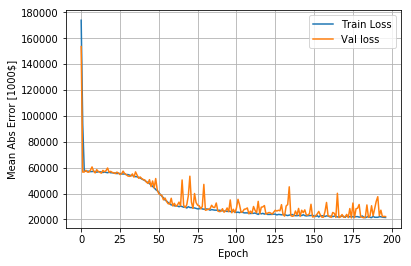

In [22]:
DNN_plot.plot_history(history)

We shown our Training vs Validation loss. Here we used tf.losses.mean_squared_error (mse) as loss aprameter and mean_absolute_error (mae) to plot our Training performaance

In below, we calculate the mae score to find test accuracy, aka our model's accuracy

In [23]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format( mae ))

Testing set Mean Abs Error: $21458.43


In [24]:
test_predictions = model.predict(test_data).flatten()

Here we can see the Regression model 

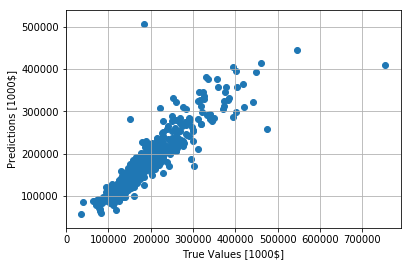

In [25]:
DNN_plot.plot_predict( test_labels, test_predictions )

We can check how much error we get

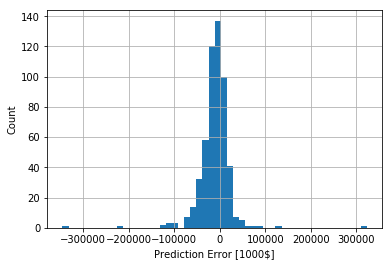

In [26]:
DNN_plot.plot_predict_error(test_labels, test_predictions)

### Experiment Depth of Neural Network

We want to check with increase of Hidden layer, does our model performs better? We increased up to 7 hidden layer

In [27]:
from libpy import CV


.
.
.
.
.
.
......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
.
.
.
.
.
.
........................................................................................................................................................................................................................................................................................

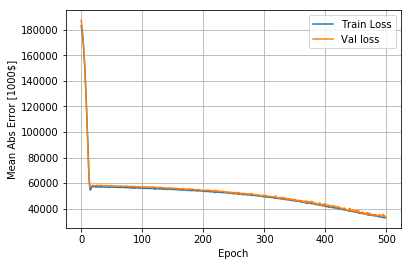

Testing set Mean Abs Error: $31218.14


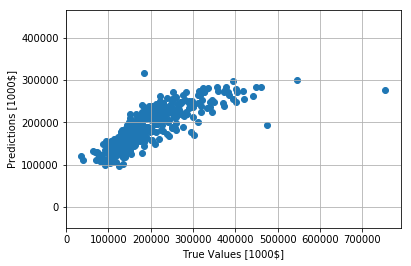


.
.
.
.
.
.
.
.........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
.
.
.
.
.
.
.
.................................................................................................................................................................................

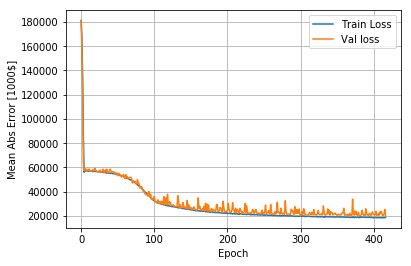

Testing set Mean Abs Error: $19424.13


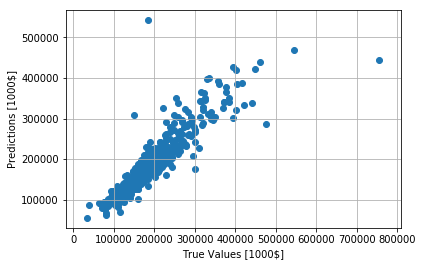


.
.
.
.
.
.
.
.
............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
.
.
.
.
.
.
.
.
..........................................................................

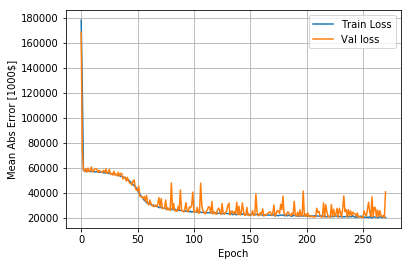

Testing set Mean Abs Error: $39666.57


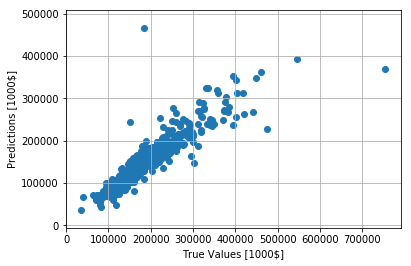


.
.
.
.
.
.
.
.
.
........................................................................................................................................................................................................._________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                13504     
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_35 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_36 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 65        
Total params: 26,049
Trainable params: 26,049
Non-trai

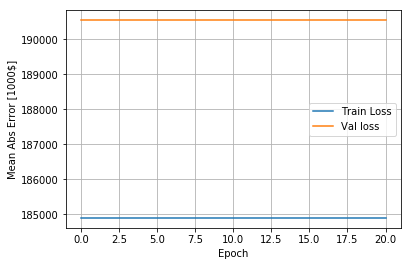

Testing set Mean Abs Error: $187915.67


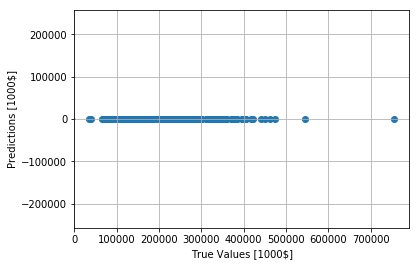


.
.
.
.
.
.
.
.
.
.
...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

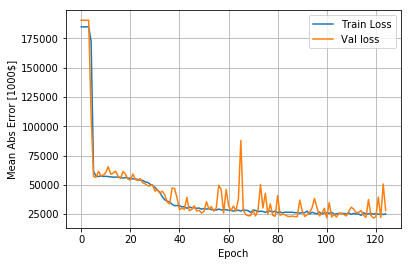

Testing set Mean Abs Error: $26845.41


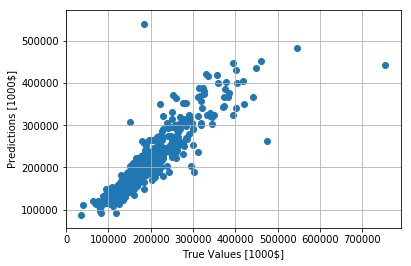


.
.
.
.
.
.
.
.
.
.
.
.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

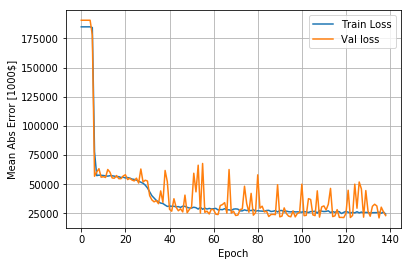

Testing set Mean Abs Error: $22236.20


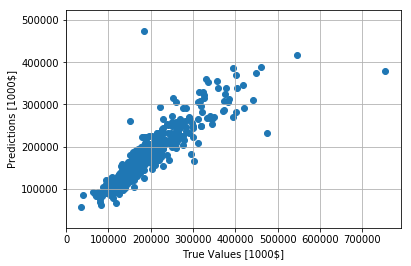


.
.
.
.
.
.
.
.
.
.
.
.
...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

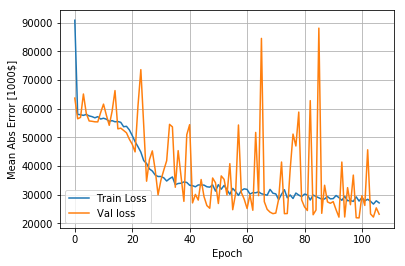

Testing set Mean Abs Error: $22758.67


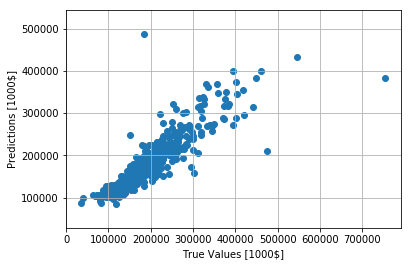

In [33]:
depths = []
scores_mae = []

for i in range( 7 ):
    model = KR.build_model(train_data, depth=i)    
    
    history, model = KR.train_model( model, train_data, train_labels )
    model.summary()
    
    DNN_plot.plot_history(history)
    
    [loss, mae] = model.evaluate(test_data, test_labels, verbose=0)
    print("Testing set Mean Abs Error: ${:7.2f}".format( mae ))
    
    test_predictions = model.predict(test_data).flatten()
    DNN_plot.plot_predict( test_labels, test_predictions )
    
    depths.append( i+2 )
    scores_mae.append( mae)    

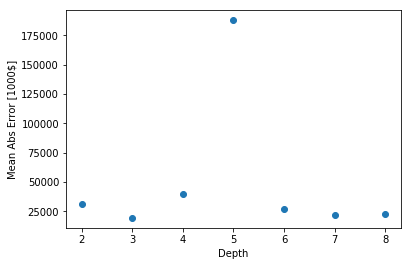

In [34]:
CV.plot_any( depths, scores_mae, xlabel='Depth', ylabel='Mean Abs Error [1000$]' )

### Experiment Overfitting

In this part, we try multiple neural network model, with various node number to check Overfitting vs Underfitting 

In [ ]:
model_16 = KR.build_model(train_data, units=16)
history_16, model_16 = KR.train_model( model_16, train_data, train_labels )
model_16.summary()

In [ ]:
loss, acc = model_16.evaluate( train_data, train_labels )
print("Trained model, accuracy: {:5.2f}%".format( acc ))

In [ ]:
model_32 = KR.build_model(train_data, units=32)
history_32, model_32 = KR.train_model( model_32, train_data, train_labels )
model_32.summary()

In [ ]:
loss, acc = model_32.evaluate( train_data, train_labels )
print("Trained model, accuracy: {:5.2f}%".format( acc))

In [ ]:
model_48 = KR.build_model(train_data, units=48)
history_48, model_48 = KR.train_model( model_48, train_data, train_labels )
model_48.summary()

In [ ]:
loss, acc = model_48.evaluate( train_data, train_labels )
print("Trained model, accuracy: {:5.2f}%".format( acc))

In [ ]:
model_64 = KR.build_model( train_data, units=64 )
history_64, model_64 = KR.train_model( model_64, train_data, train_labels )
model_64.summary()

In [ ]:
loss, acc = model_64.evaluate( train_data, train_labels )
print("Trained model, accuracy: {:5.2f}%".format( acc))

In [ ]:
model_128 = KR.build_model( train_data, units=128)
history_128, model_128 = KR.train_model( model_128, train_data, train_labels )
model_128.summary()

In [ ]:
loss, acc = model_128.evaluate( train_data, train_labels )
print("Trained model, accuracy: {:5.2f}%".format( acc))

In [ ]:
model_512 = KR.build_model(train_data, units=512)
history_512, model_512 = KR.train_model( model_512, train_data, train_labels )
model_512.summary()

In [ ]:
loss, acc = model_512.evaluate( train_data, train_labels )
print("Trained model, accuracy: {:5.2f}%".format( acc))

In [ ]:
DNN_plot.plot_compare_history( [
    ('history_16', history_16 ),
    ('history_32', history_32 ),
    ('history_48', history_48 ),
    ('history_64', history_64 ),
    ('history_128', history_128 ),
    ('history_512', history_512 )
] )

In our case, Validation and Training loss corrosponds to each other, all the models does not face any Overfitting or Underfitting. As we used EarlyStopping to stop training when val_loss stops to update. At the same time we used keras.regularizers.l2 to regularize our model.